# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', None)


## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
fitbit = pd.read_csv('../Data/Fitbit2.csv')

fitbit.head()

Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0  2015-05-08            1934    905      0.65       0              1.355   
1  2015-05-09            3631  18925     14.11       4            611.000   
2  2015-05-10            3204  14228     10.57       1            602.000   
3  2015-05-11            2673   6756      5.02       8            749.000   
4  2015-05-12            2495    502      3.73       1            876.000   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                      46                      0                    0   
1                     316                     61                   60   
2                     226                     14                   77   
3                     190                     23                    4   
4                     171                      0                    0   

   Activity Calories  MinutesOfSleep  MinutesOfBeingAwake  NumberOfAwakings  \
0               1680             384                   26                23   
1               2248             454                   35                21   
2               1719             387                   46                25   
3               9620             311                   31                21   
4               7360             407                   65                44   

   LengthOfRestInMinutes  Distance_miles      Days  Days_encoded  \
0                    417        0.403891    Friday           4.0   
1                    491        8.767545  Saturday           5.0   
2                    436        6.567891    Sunday           6.0   
3                    350        3.119282    Monday           0.0   
4                    491        2.317714   Tuesday           1.0   

   Work_or_Weekend  Hours Sleep  Sleep efficiency  Yesterday_sleep  \
0                1     6.400000         92.086331         0.000000   
1                0     7.566667         92.464358         6.400000   
2                0     6.450000         88.761468         7.566667   
3                1     5.183333         88.857143         6.450000   
4                1     6.783333         82.892057         5.183333   

   Yesterday_sleep_efficiency Months  Months_encoded  
0                    0.000000    May               5  
1                   92.086331    May               5  
2                   92.464358    May               5  
3                   88.761468    May               5  
4                   88.857143    May               5

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [20]:
# AVERAGE STEPS BY MONTH_ENCODED

avg_steps_by_month = fitbit.groupby('Months_encoded')['Steps'].median()
avg_steps_by_month

Months_encoded
1     10366.0
2      9235.0
3     11122.0
4     13846.5
5     11998.0
6     12935.5
7     10644.0
8     12213.0
9      9343.0
10     7865.0
11     9453.5
12     8531.0
Name: Steps, dtype: float64

In [21]:
avg_steps_by_ww = fitbit.groupby('Work_or_Weekend')['Steps'].mean()
avg_steps_by_ww

Work_or_Weekend
0    10064.238095
1    10144.572519
Name: Steps, dtype: float64

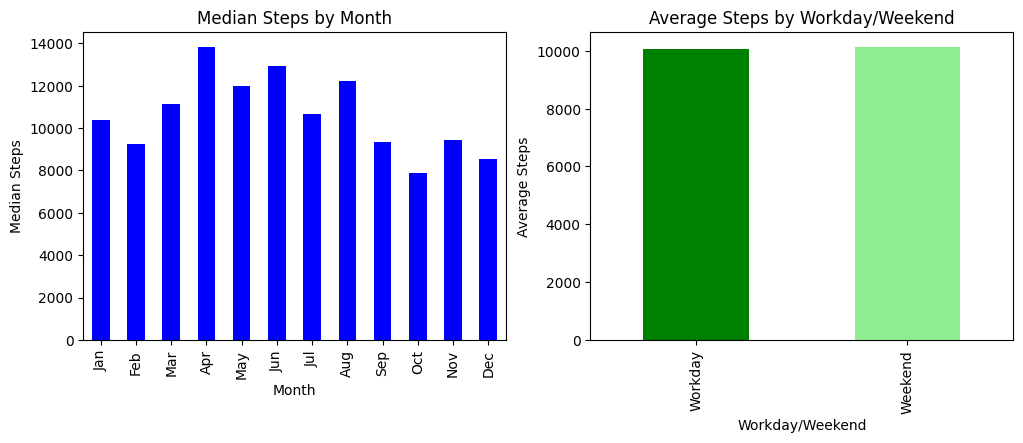

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Explore plt.sca
#Explore plt.xticks

plt.sca(axes[0])
avg_steps_by_month.plot(kind='bar', color='blue')
plt.title('Median Steps by Month')
plt.xlabel('Month')
plt.ylabel('Median Steps')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.sca(axes[1])
avg_steps_by_ww.plot(kind='bar', color=['green','lightgreen'])
plt.title('Average Steps by Workday/Weekend')
plt.xlabel('Workday/Weekend')
plt.ylabel('Average Steps')
plt.xticks(range(2), ['Workday', 'Weekend'])


plt.show()

In [29]:
#Save your figures in a folder called figures in your repo.

#plt.savefig('avg_steps.png')

<Figure size 640x480 with 0 Axes>

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

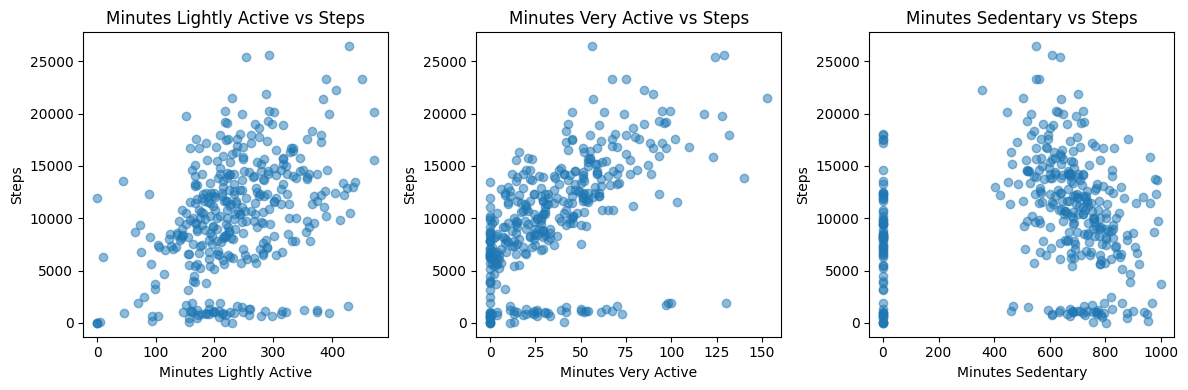

In [35]:
opciones = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

plt.figure(figsize=(12, 4))

for i, opciones in enumerate(opciones, 1):
    plt.subplot(1, 3, i)
    plt.scatter(fitbit[opciones], fitbit['Steps'], alpha=0.5)
    plt.title(f'{opciones} vs Steps')
    plt.xlabel(opciones)
    plt.ylabel('Steps')


plt.tight_layout()
    
plt.show()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [3]:
titanic = pd.read_csv('../Data/titanic.csv')

titanic.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500    U0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250    U0        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500    U0        S

#### Explore the titanic dataset using Pandas dtypes.

In [4]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [5]:
# NUMERICAL VARIABLES

numerical_variables = titanic.select_dtypes(include=['number']) 

numerical_variables.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [6]:
# CATEGORICAL VARIABLES
categorical_variables = titanic.select_dtypes(exclude=['number'])

categorical_variables.columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [7]:
sns.set_style("white")

# Set the figure size to (12, 6)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [8]:
plt.style.use('classic')

# Set the figure size to (12, 6)
plt.figure(figsize=(12, 6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

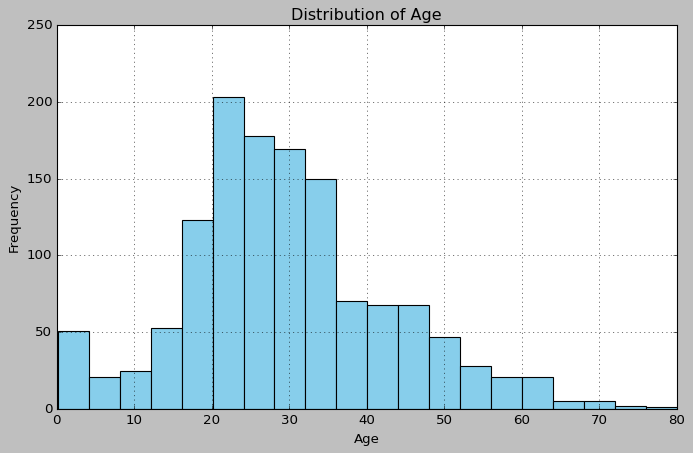

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(titanic['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

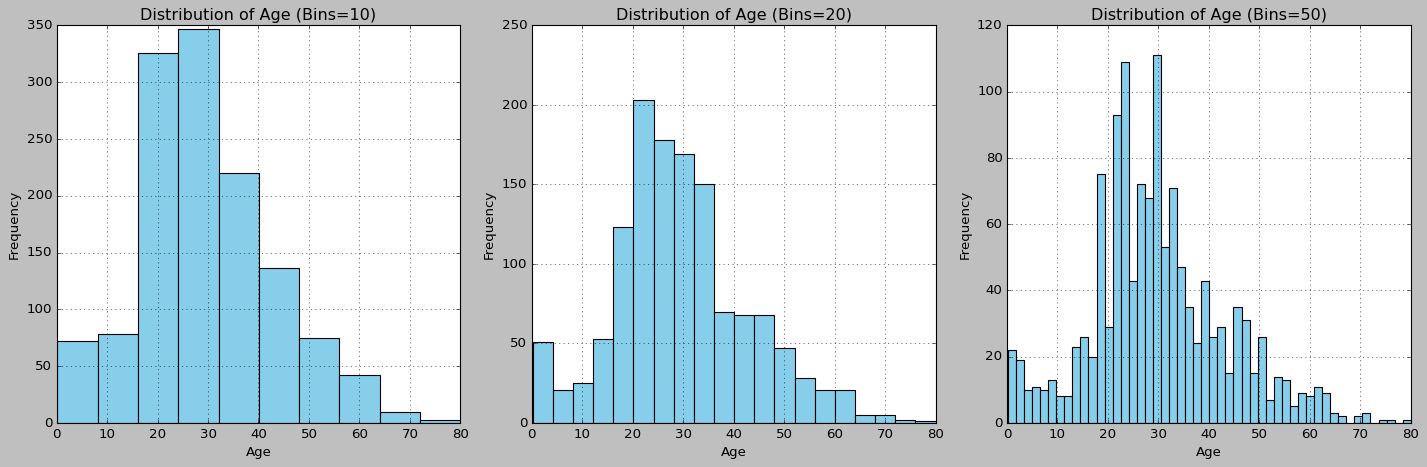

In [10]:

bin_sizes = [10, 20, 50]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for i, bins in enumerate(bin_sizes):
    axes[i].hist(titanic['Age'].dropna(), bins=bins, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of Age (Bins={bins})')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()

plt.show()



#### How does the bin size affect your plot?

El tamaño de los intervalos (o "bins") en un histograma afecta la apariencia y la interpretación del gráfico al controlar la cantidad de barras utilizadas para representar los datos. La elección del tamaño de los intervalos puede tener un impacto significativo en cómo se visualiza la distribución de datos:

- Pequeños: Utilizar intervalos más pequeños resulta en más barras en el histograma, lo que proporciona un mayor nivel de detalle. Los intervalos más pequeños pueden resaltar pequeñas variaciones, pero pueden ocultar la tendencia general.
- Grandes: Utilizar intervalos más grandes resulta en menos barras en el histograma, ofreciendo una vista más general de la distribución de los datos. Pueden identificar las características principales de la distribución, pero podrían pasar por alto variaciones a menor escala.

#### Use seaborn to show the distribution of column `Age`.

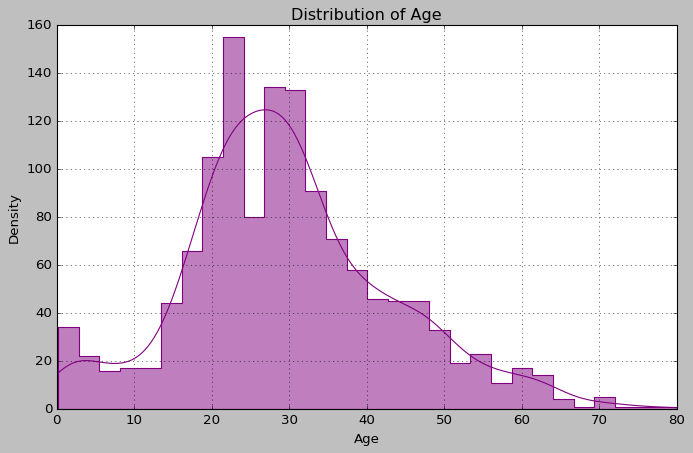

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(titanic['Age'].dropna(), kde=True, color='purple', element='step')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)

plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

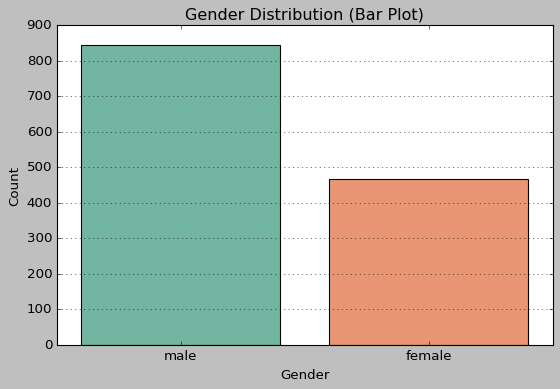

In [12]:
# Method 1 - seaborn

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Gender', palette='Set2')
plt.title('Gender Distribution (Bar Plot)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

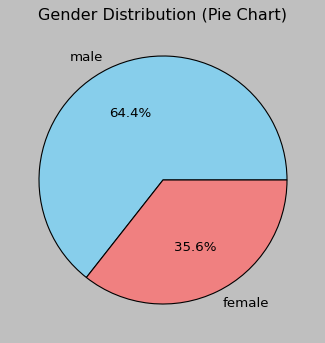

In [15]:
# Method 2 - matplotlib

gender_counts = titanic['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution (Pie Chart)')

plt.show()

#### Use the right plot to visualize the column `Pclass`.

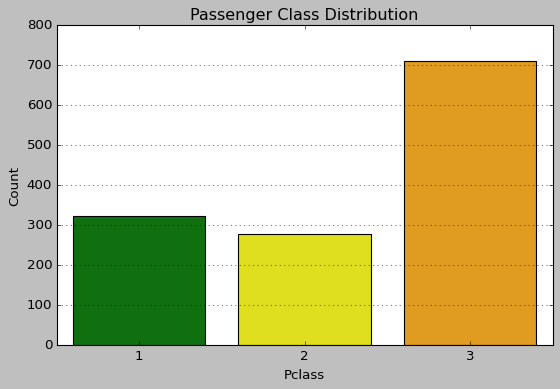

In [16]:
plt.figure(figsize = (8, 5))
sns.countplot(data = titanic, x='Pclass', palette=['green', 'yellow','orange'])
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(axis='y')

plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

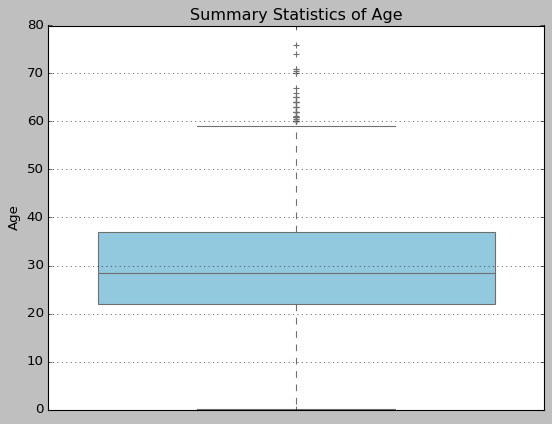

In [19]:
# Create a box plot for the Age feature

plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, y='Age', color='skyblue')
plt.title('Summary Statistics of Age')
plt.ylabel('Age')
plt.grid(axis='y')

plt.show()

He elegido un 'box plot' para visualizar las estadísticas resumidas de la característica "Age" (Edad) por las siguientes razones:
- estadísticos: representación concisa de estadísticas clave, como la mediana, los cuartiles (25% y 75%), y los posibles valores atípicos (outliers). Esto permite comprender rápidamente la distribución central de la edad y su dispersión.
- identificación de Outliers: útil para detectar observaciones inusuales en la distribución de edades.
- interpretación Visual Clara: El box plot es fácil de entender y proporciona una representación visual eficaz de las estadísticas resumidas de la edad.

#### What does the last plot tell you about the feature `Age`?

    - que la mayoría de las personas están entre los 24 (aprox) y 38 años. 

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

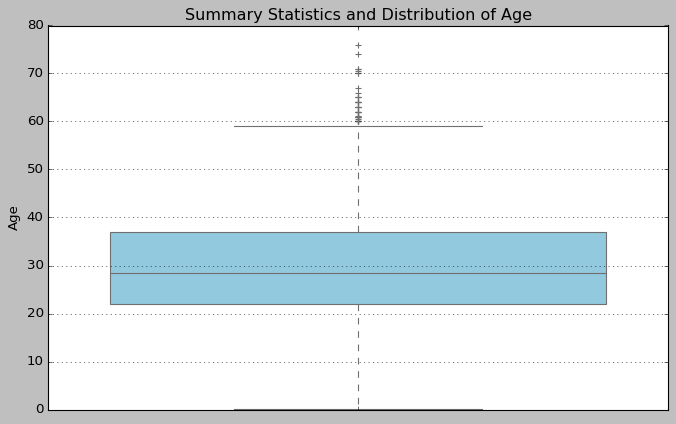

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic, y='Age', color='skyblue')
plt.title('Summary Statistics and Distribution of Age')
plt.ylabel('Age')
plt.grid(axis='y')

plt.show()

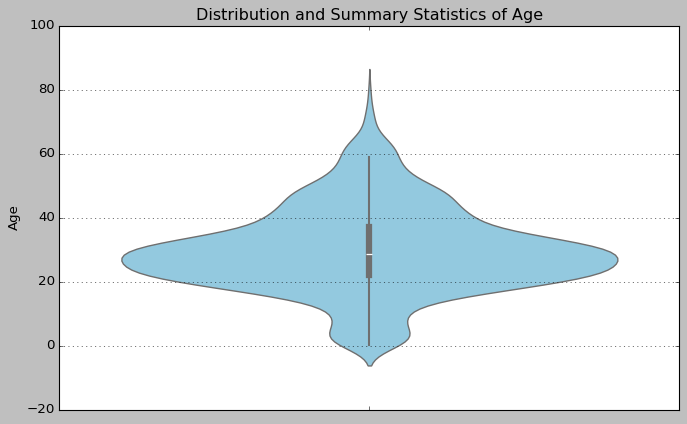

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic, y='Age', color='skyblue')
plt.title('Distribution and Summary Statistics of Age')
plt.ylabel('Age')
plt.grid(axis='y')

plt.show()

#### What additional information does the last plot provide about feature `Age`?

    - Los diagramas de violín están estrechamente relacionados con los diagramas de caja (boxplot), sin embargo, añaden información útil, como la distribución de los datos de la muestra (traza de densidad).

    - De forma predeterminada, los diagramas de caja muestran puntos de datos fuera de 1,5 * el rango intercuartil como valores atípicos por encima o por debajo de los bigotes, mientras que los diagramas de violín muestran todo el rango de datos.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

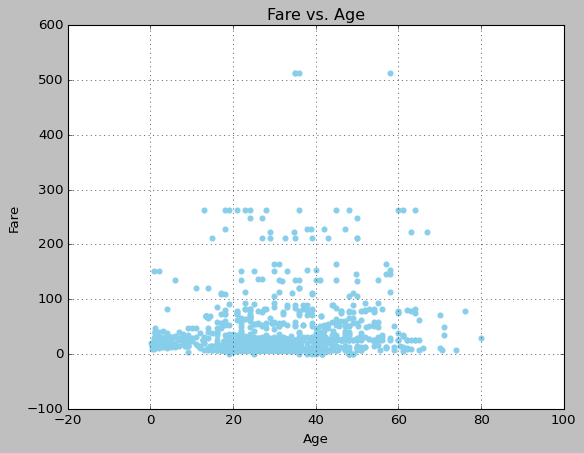

In [34]:
# Method 1 - matplotlib


plt.figure(figsize=(8, 6))
plt.scatter(titanic['Age'], titanic['Fare'], color='skyblue', marker='o')
plt.title('Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)

plt.show()


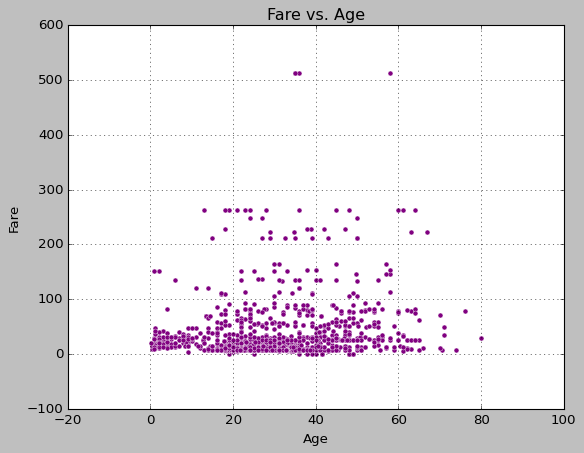

In [29]:
# Method 2 - seaborn


plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x='Age', y='Fare', color='purple')
plt.title('Fare vs. Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)

plt.show()

#### Plot the correlation matrix using seaborn.

In [40]:
numerical_variables = titanic.select_dtypes(include=['number']) 

numerical_variables.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [41]:
# Calculo la matriz de correlación sobre las columnas numéricas. 
# Se utiliza para comprender cómo las variables numéricas están relacionadas entre sí

correlation_matrix = numerical_variables.corr()

In [46]:
numerical_variables.shape

(1309, 7)

In [50]:
numerical_variables

PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
0               1       0.0       3  22.000000      1      0    7.2500
1               2       1.0       1  38.000000      1      0   71.2833
2               3       1.0       3  26.000000      0      0    7.9250
3               4       1.0       1  35.000000      1      0   53.1000
4               5       0.0       3  35.000000      0      0    8.0500
...           ...       ...     ...        ...    ...    ...       ...
1304         1305       NaN       3  29.513190      0      0    8.0500
1305         1306       NaN       1  39.000000      0      0  108.9000
1306         1307       NaN       3  38.500000      0      0    7.2500
1307         1308       NaN       3  29.513190      0      0    8.0500
1308         1309       NaN       3  25.315435      1      1   22.3583

[1309 rows x 7 columns]

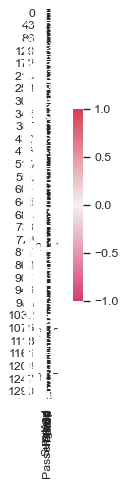

In [64]:
sns.set(style='white')     # estilo blanco

mascara = np.triu(np.ones_like(numerical_variables))   # mascara

cmap = sns.diverging_palette(0, 7, as_cmap=True)   # paleta de colores


sns.heatmap(numerical_variables,          # datos
            mask = mascara,  # mascara
            cmap = cmap,     # paleta de colores
            vmax = 1,           # maximo vertical
            vmin = -1,          # minimo vertical
            center = 0,         # centro
            square = True,      # cuadrado el dato pintado
            linewidth = 0.5,    # ancho de la linea
            
            cbar_kws={'shrink': 0.5},  # barra de color
            annot=True                 # anotacion, el numero escrito
           );

#cuanto más claro el color, menos correlacion

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

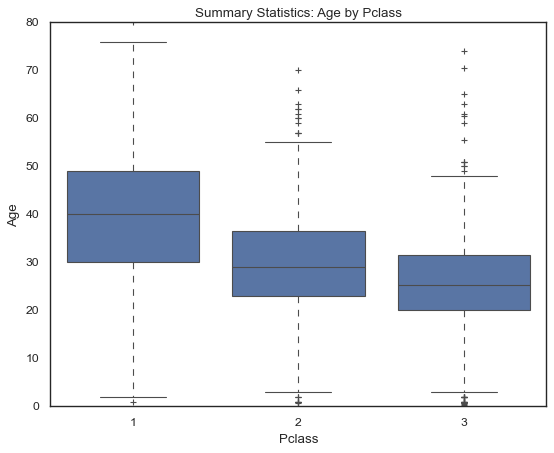

In [51]:

plt.figure(figsize=(8, 6))

sns.boxplot(data=titanic, x='Pclass', y='Age',)

plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Summary Statistics: Age by Pclass')

plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)

sns.FacetGrid(tips, col="time", row="sex")

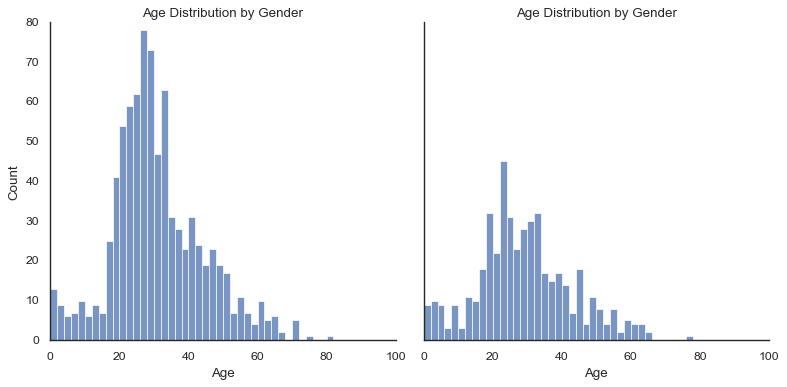

In [62]:
datos = sns.FacetGrid(titanic, col='Gender', height=5, aspect=1)

datos.map(sns.histplot, 'Age', binwidth=2, binrange=(0,100))

datos.set_axis_labels('Age', 'Count')
datos.set_titles('Age Distribution by Gender')

plt.show()
